# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "metric"

# Build partial query URL
query_url = f"&appid={weather_api_key}&units={units}"

# set up lists to hold reponse info
lat = []
lng = []
temp = []
cloudiness = []
humidity = []
wind = []
country = []
dt = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(url + str(city) + query_url).json()
    try:
        lat.append(response['coord']['lat'])
    except: 
        lat.append("NA")
    try:
        temp.append(response['main']['temp_max'])
    except:
        temp.append("NA")
    try:    
        lng.append(response['coord']['lon'])
    except:
        lng.append("NA")
    try:
        cloudiness.append(response['clouds']['all'])
    except:
        cloudiness.append("NA")
    try:
        humidity.append(response['main']['humidity'])
    except:
        humidity.append("NA")
    try:
        wind.append(response['wind']['speed'])
    except:
        wind.append("NA")
    try:
        country.append(response['sys']['country'])
    except:
        country.append("NA")
    try:
        dt.append(response['dt'])
    except:
        dt.append("NA")


In [5]:
# create a data frame from cities, lat, lng, temp, cloudiness, and humidity
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date/Time": dt
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date/Time
0,bambous virieux,-20.3428,57.7575,20.68,77,75,5.66,MU,1660332771
1,ushuaia,-54.8,-68.3,3.81,60,0,1.03,AR,1660332573
2,belem,-1.4558,-48.5044,30.02,74,40,5.66,BR,1660332732
3,fairbanks,64.8378,-147.7164,18.9,61,75,1.54,US,1660332772
4,saint-philippe,-21.3585,55.7679,18.77,79,73,6.59,RE,1660332772
...,...,...,...,...,...,...,...,...,...
617,poya,-21.35,165.15,19.62,70,51,3.4,NC,1660332944
618,kavaratti,10.5669,72.642,27.13,84,63,6.51,IN,1660332944
619,san julian,21.0167,-102.1667,25.94,32,90,1.7,MX,1660332944
620,namatanai,-3.6667,152.4333,25.22,82,100,2.54,PG,1660332945


In [6]:
weather_data = weather_data[weather_data["Lat"] != "NA"]
weather_data = weather_data[weather_data["Lng"] != "NA"]
weather_data = weather_data[weather_data["Max Temp"] != "NA"]
weather_data = weather_data[weather_data["Humidity"] != "NA"]
weather_data = weather_data[weather_data["Cloudiness"] != "NA"]
weather_data = weather_data[weather_data["Wind Speed"] != "NA"]
weather_data = weather_data[weather_data["Country"] != "NA"]
weather_data = weather_data[weather_data["Date/Time"] != "NA"]
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date/Time
0,bambous virieux,-20.3428,57.7575,20.68,77,75,5.66,MU,1660332771
1,ushuaia,-54.8,-68.3,3.81,60,0,1.03,AR,1660332573
2,belem,-1.4558,-48.5044,30.02,74,40,5.66,BR,1660332732
3,fairbanks,64.8378,-147.7164,18.9,61,75,1.54,US,1660332772
4,saint-philippe,-21.3585,55.7679,18.77,79,73,6.59,RE,1660332772
...,...,...,...,...,...,...,...,...,...
617,poya,-21.35,165.15,19.62,70,51,3.4,NC,1660332944
618,kavaratti,10.5669,72.642,27.13,84,63,6.51,IN,1660332944
619,san julian,21.0167,-102.1667,25.94,32,90,1.7,MX,1660332944
620,namatanai,-3.6667,152.4333,25.22,82,100,2.54,PG,1660332945


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv('weather_data_cleaned.csv', index = False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date/Time
0,bambous virieux,-20.3428,57.7575,20.68,77,75,5.66,MU,1660332771
1,ushuaia,-54.8,-68.3,3.81,60,0,1.03,AR,1660332573
2,belem,-1.4558,-48.5044,30.02,74,40,5.66,BR,1660332732
3,fairbanks,64.8378,-147.7164,18.9,61,75,1.54,US,1660332772
4,saint-philippe,-21.3585,55.7679,18.77,79,73,6.59,RE,1660332772
...,...,...,...,...,...,...,...,...,...
617,poya,-21.35,165.15,19.62,70,51,3.4,NC,1660332944
618,kavaratti,10.5669,72.642,27.13,84,63,6.51,IN,1660332944
619,san julian,21.0167,-102.1667,25.94,32,90,1.7,MX,1660332944
620,namatanai,-3.6667,152.4333,25.22,82,100,2.54,PG,1660332945


In [8]:
weather_data.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date/Time
count,568,568.0000,568.0000,568.00,568,568,568.00,568,568
unique,568,568.0000,568.0000,511.00,87,90,342.00,125,231
top,bambous virieux,-20.3428,57.7575,24.98,87,100,2.57,RU,1660332623
freq,1,1.0000,1.0000,3.00,23,125,17.00,75,6


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_data = weather_data[weather_data["Humidity"] < 101]
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date/Time
0,bambous virieux,-20.3428,57.7575,20.68,77,75,5.66,MU,1660332771
1,ushuaia,-54.8,-68.3,3.81,60,0,1.03,AR,1660332573
2,belem,-1.4558,-48.5044,30.02,74,40,5.66,BR,1660332732
3,fairbanks,64.8378,-147.7164,18.9,61,75,1.54,US,1660332772
4,saint-philippe,-21.3585,55.7679,18.77,79,73,6.59,RE,1660332772
...,...,...,...,...,...,...,...,...,...
617,poya,-21.35,165.15,19.62,70,51,3.4,NC,1660332944
618,kavaratti,10.5669,72.642,27.13,84,63,6.51,IN,1660332944
619,san julian,21.0167,-102.1667,25.94,32,90,1.7,MX,1660332944
620,namatanai,-3.6667,152.4333,25.22,82,100,2.54,PG,1660332945


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

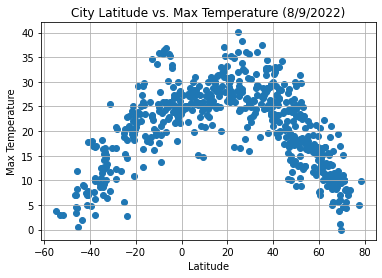

In [81]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature (8/9/2022)')
plt.grid()
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

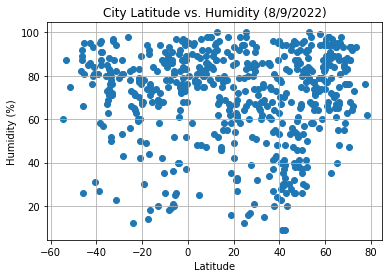

In [82]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (8/9/2022)')
plt.grid()
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

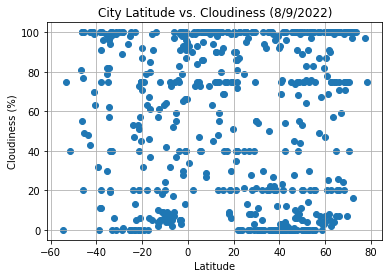

In [83]:
# Create a Scatter Plot for humidity vs cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (8/9/2022)')
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

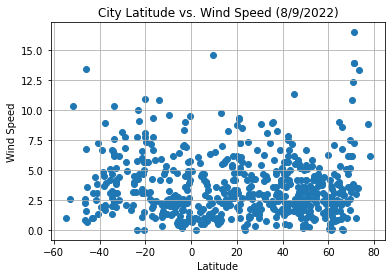

In [84]:
# Create a Scatter Plot for humidity vs wind speed
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (8/9/2022)')
plt.grid()
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7233620223567583


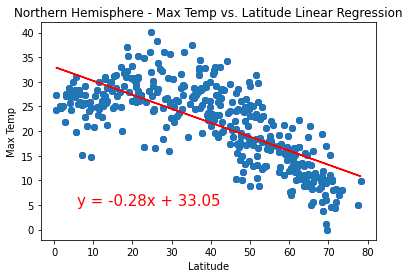

In [86]:
# Create a Scatter Plot for Max Temp vs positive latitude
weather_data_pos_lat = weather_data[weather_data["Lat"] > 0]

# Make sure necessary columns are floats
weather_data_pos_lat = weather_data_pos_lat.astype({'Lat':'float'})
weather_data_pos_lat = weather_data_pos_lat.astype({'Max Temp':'float'})

x_values = weather_data_pos_lat['Lat']
y_values = weather_data_pos_lat['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,5),fontsize=15,color="red")


plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8144928064711142


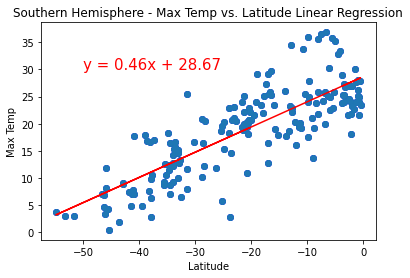

In [87]:
# Create a Scatter Plot for Max Temp vs negative latitude
weather_data_neg_lat = weather_data[weather_data["Lat"] < 0]

# Make sure necessary columns are floats
weather_data_neg_lat = weather_data_neg_lat.astype({'Lat':'float'})
weather_data_neg_lat = weather_data_neg_lat.astype({'Max Temp':'float'})

x_values = weather_data_neg_lat['Lat']
y_values = weather_data_neg_lat['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05150722417046807


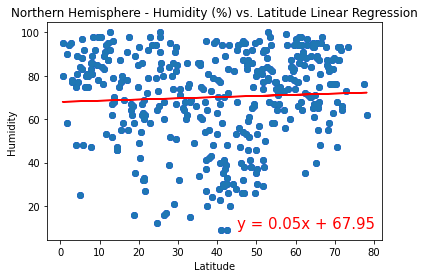

In [88]:
# Create a Scatter Plot for Humidity vs positive latitude
weather_data_pos_lat = weather_data[weather_data["Lat"] > 0]

# Make sure necessary columns are floats
weather_data_pos_lat = weather_data_pos_lat.astype({'Lat':'float'})
weather_data_pos_lat = weather_data_pos_lat.astype({'Humidity':'float'})

x_values = weather_data_pos_lat['Lat']
y_values = weather_data_pos_lat['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.11071411414182737


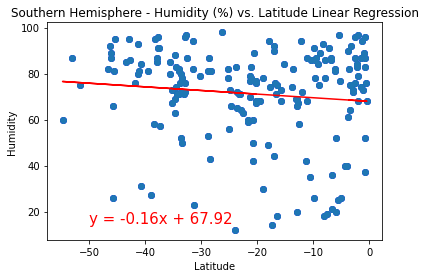

In [89]:
# Create a Scatter Plot for Humidity vs negative latitude
weather_data_neg_lat = weather_data[weather_data["Lat"] < 0]

# Make sure necessary columns are floats
weather_data_neg_lat = weather_data_neg_lat.astype({'Lat':'float'})
weather_data_neg_lat = weather_data_neg_lat.astype({'Humidity':'float'})

x_values = weather_data_neg_lat['Lat']
y_values = weather_data_neg_lat['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06701665013168975


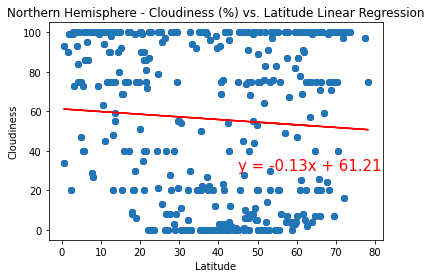

In [92]:
# Create a Scatter Plot for Cloudiness vs positive latitude
weather_data_pos_lat = weather_data[weather_data["Lat"] > 0]

# Make sure necessary columns are floats
weather_data_pos_lat = weather_data_pos_lat.astype({'Lat':'float'})
weather_data_pos_lat = weather_data_pos_lat.astype({'Cloudiness':'float'})

x_values = weather_data_pos_lat['Lat']
y_values = weather_data_pos_lat['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.14640299372642365


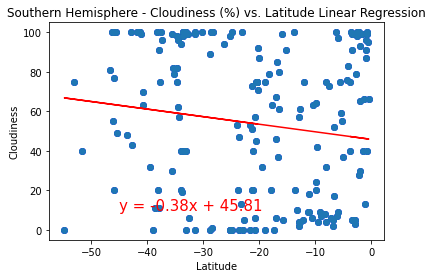

In [93]:
# Create a Scatter Plot for Cloudiness vs negative latitude
weather_data_neg_lat = weather_data[weather_data["Lat"] < 0]

# Make sure necessary columns are floats
weather_data_neg_lat = weather_data_neg_lat.astype({'Lat':'float'})
weather_data_neg_lat = weather_data_neg_lat.astype({'Cloudiness':'float'})

x_values = weather_data_neg_lat['Lat']
y_values = weather_data_neg_lat['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,10),fontsize=15,color="red")

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08386649952729802


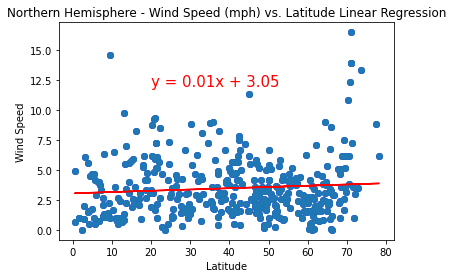

In [94]:
# Create a Scatter Plot for wind speed vs positive latitude
weather_data_pos_lat = weather_data[weather_data["Lat"] > 0]

# Make sure necessary columns are floats
weather_data_pos_lat = weather_data_pos_lat.astype({'Lat':'float'})
weather_data_pos_lat = weather_data_pos_lat.astype({'Wind Speed':'float'})

x_values = weather_data_pos_lat['Lat']
y_values = weather_data_pos_lat['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,12),fontsize=15,color="red")

plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10461016696592271


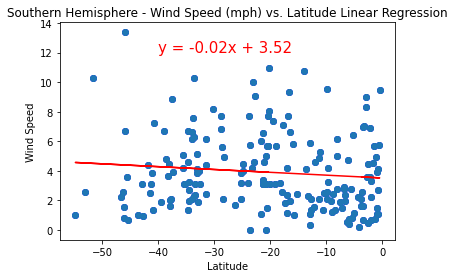

In [95]:
# Create a Scatter Plot for wind speed vs negative latitude
weather_data_neg_lat = weather_data[weather_data["Lat"] < 0]

# Make sure necessary columns are floats
weather_data_neg_lat = weather_data_neg_lat.astype({'Lat':'float'})
weather_data_neg_lat = weather_data_neg_lat.astype({'Wind Speed':'float'})

x_values = weather_data_neg_lat['Lat']
y_values = weather_data_neg_lat['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.scatter(x_values,y_values,c='b')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")

plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
print("The r-value is: " + str(rvalue))
plt.show()

### Analysis

1. Max temp clearly increases as you reach the equator and decreases as you go towards one of the poles. Both hemispheres show this pattern.
2. Latitude has very little effect on wind speed. This is observable for both hemispheres, and makes sense because high winds can exist in both extremely cold and warm environments.
3. The data taken for cloudiness is often rounded to very distinct levels, likely due to an observer approximating the value to the nearest ten, with the most common values being 100 or 0.